### Stock market predciction using stacked LSTM

#### Data Collection

In [226]:
import pandas_datareader as pdr

You will get the value of apple stock price in df 

In [227]:
key = 'dfca9bed7bc3baf79073e440852f8089e2624414'
df = pdr.get_data_tiingo('AAPL', api_key=key)
df.to_csv('AAPL.csv')

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


Read the file again using pandas

In [228]:
import pandas as pd
df=pd.read_csv('AAPL.csv')

In [229]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-06-14 00:00:00+00:00,145.16,147.5000,143.84,147.50,31224203,34.348279,34.901978,34.035936,34.901978,124896812,0.0,1.0
1,AAPL,2017-06-15 00:00:00+00:00,144.29,144.4798,142.21,143.32,31348832,34.142416,34.187328,33.650239,33.912892,125395328,0.0,1.0
2,AAPL,2017-06-16 00:00:00+00:00,142.27,144.5000,142.20,143.78,49180748,33.664437,34.192107,33.647873,34.021738,196722992,0.0,1.0
3,AAPL,2017-06-19 00:00:00+00:00,146.34,146.7400,143.66,143.66,31449132,34.627495,34.722144,33.993344,33.993344,125796528,0.0,1.0
4,AAPL,2017-06-20 00:00:00+00:00,145.01,146.8700,144.94,146.87,24572170,34.312785,34.752905,34.296222,34.752905,98288680,0.0,1.0


In [230]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2022-06-06 00:00:00+00:00,146.14,148.5689,144.90,147.030,71598380,146.14,148.5689,144.90,147.030,71598380,0.0,1.0
1254,AAPL,2022-06-07 00:00:00+00:00,148.71,149.0000,144.10,144.345,67808150,148.71,149.0000,144.10,144.345,67808150,0.0,1.0
1255,AAPL,2022-06-08 00:00:00+00:00,147.96,149.8697,147.46,148.580,53950201,147.96,149.8697,147.46,148.580,53950201,0.0,1.0
1256,AAPL,2022-06-09 00:00:00+00:00,142.64,147.9500,142.53,147.080,69472976,142.64,147.9500,142.53,147.080,69472976,0.0,1.0
1257,AAPL,2022-06-10 00:00:00+00:00,137.13,140.7600,137.06,140.280,91566637,137.13,140.7600,137.06,140.280,91566637,0.0,1.0


In [231]:
df1=df.reset_index()['close'] # We are taking only close column

In [232]:
df1.shape
df1

0       145.16
1       144.29
2       142.27
3       146.34
4       145.01
         ...  
1253    146.14
1254    148.71
1255    147.96
1256    142.64
1257    137.13
Name: close, Length: 1258, dtype: float64

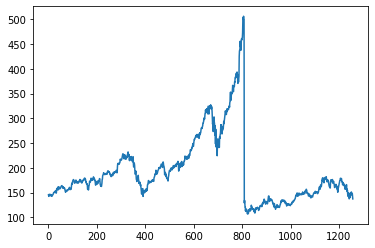

In [233]:
import matplotlib.pyplot as plt
plt.plot(df1)

#### LSTM are sensitive to the scle of the data. so we apply MinMax scaler

In [234]:
import numpy as np

Scaling the values of the data and converting it into array

In [235]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
### reshape(-1, 1) does is wherever you -1 it will remain as it is and wherever you will give 1 there it will add an extra dimension
df1=scaler.fit_transform(np.array(df1).reshape(-1, 1))

In [236]:
df1

array([[0.09597996],
       [0.09380088],
       [0.08874139],
       ...,
       [0.10299311],
       [0.08966813],
       [0.07586725]])

In [237]:
df1.shape

(1258, 1)

In [238]:
# Splitting dataset into training and test set
training_size=int(len(df1)*0.65)
test_size=len(df1) - training_size
train_data, test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [239]:
training_size, test_size
test_data

array([[0.01292423],
       [0.02132749],
       [0.02179086],
       [0.01324984],
       [0.00876644],
       [0.        ],
       [0.00811522],
       [0.01244834],
       [0.00070131],
       [0.00345648],
       [0.01362555],
       [0.02033813],
       [0.01815905],
       [0.02246713],
       [0.02492173],
       [0.01547902],
       [0.02419537],
       [0.01582968],
       [0.0206387 ],
       [0.02036318],
       [0.02537257],
       [0.04398247],
       [0.03571697],
       [0.03594239],
       [0.03474014],
       [0.0305072 ],
       [0.02289292],
       [0.02672511],
       [0.0251221 ],
       [0.02231684],
       [0.02053851],
       [0.02056356],
       [0.02444584],
       [0.01092048],
       [0.02123982],
       [0.00505949],
       [0.00483406],
       [0.00901691],
       [0.02031309],
       [0.03053225],
       [0.02968065],
       [0.02374452],
       [0.02286788],
       [0.03168441],
       [0.03098309],
       [0.03110833],
       [0.03371321],
       [0.031

In [240]:
len(train_data), len(test_data)

(817, 441)

In [241]:
import numpy as np
# Convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0] #i=0, 0,1,2,3
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [242]:
### reshape into X=t, t+1, t+2, t+3
time_step = 100
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

In [243]:
X_train

array([[0.09597996, 0.09380088, 0.08874139, ..., 0.15579211, 0.15040701,
        0.15346274],
       [0.09380088, 0.08874139, 0.0989355 , ..., 0.15040701, 0.15346274,
        0.16445836],
       [0.08874139, 0.0989355 , 0.09560426, ..., 0.15346274, 0.16445836,
        0.16884158],
       ...,
       [0.44480902, 0.45046963, 0.44072636, ..., 0.0684784 , 0.06151534,
        0.03516594],
       [0.45046963, 0.44072636, 0.42602379, ..., 0.06151534, 0.03516594,
        0.03536631],
       [0.44072636, 0.42602379, 0.40458359, ..., 0.03516594, 0.03536631,
        0.01497808]])

In [244]:
X_train.shape, Y_train.shape

((716, 100), (716,))

In [245]:
X_test.shape, Y_test.shape

((340, 100), (340,))

In [246]:
# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [247]:
X_train, X_test # 3d array
 

(array([[[0.09597996],
         [0.09380088],
         [0.08874139],
         ...,
         [0.15579211],
         [0.15040701],
         [0.15346274]],
 
        [[0.09380088],
         [0.08874139],
         [0.0989355 ],
         ...,
         [0.15040701],
         [0.15346274],
         [0.16445836]],
 
        [[0.08874139],
         [0.0989355 ],
         [0.09560426],
         ...,
         [0.15346274],
         [0.16445836],
         [0.16884158]],
 
        ...,
 
        [[0.44480902],
         [0.45046963],
         [0.44072636],
         ...,
         [0.0684784 ],
         [0.06151534],
         [0.03516594]],
 
        [[0.45046963],
         [0.44072636],
         [0.42602379],
         ...,
         [0.06151534],
         [0.03516594],
         [0.03536631]],
 
        [[0.44072636],
         [0.42602379],
         [0.40458359],
         ...,
         [0.03516594],
         [0.03536631],
         [0.01497808]]]),
 array([[[0.01292423],
         [0.02132749],
         

In [248]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM


In [249]:
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [250]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_13 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_14 (LSTM)              (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [251]:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
12/12 [==============================] - 10s 330ms/step - loss: 0.0380 - val_loss: 0.0026
Epoch 2/100
12/12 [==============================] - 2s 201ms/step - loss: 0.0143 - val_loss: 0.0068
Epoch 3/100
12/12 [==============================] - 2s 204ms/step - loss: 0.0092 - val_loss: 0.0026
Epoch 4/100
12/12 [==============================] - 2s 201ms/step - loss: 0.0081 - val_loss: 0.0018
Epoch 5/100
12/12 [==============================] - 2s 202ms/step - loss: 0.0075 - val_loss: 3.4883e-04
Epoch 6/100
12/12 [==============================] - 2s 198ms/step - loss: 0.0074 - val_loss: 4.0238e-04
Epoch 7/100
12/12 [==============================] - 3s 216ms/step - loss: 0.0077 - val_loss: 3.3510e-04
Epoch 8/100
12/12 [==============================] - 2s 199ms/step - loss: 0.0071 - val_loss: 4.1972e-04
Epoch 9/100
12/12 [==============================] - 2s 200ms/step - loss: 0.0074 - val_loss: 0.0010
Epoch 10/100
12/12 [==============================] - 2s 203ms/step - loss

In [252]:
model.save('Stock_market_prediction.h5')

In [253]:
### Lets do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [254]:
### Transformback to original form rescale it
import math
from sklearn.metrics import mean_squared_error
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [255]:
math.sqrt(mean_squared_error(Y_train, train_predict))

238.96067021017274

In [256]:
math.sqrt(mean_squared_error(Y_test, test_predict))

153.4365776763072

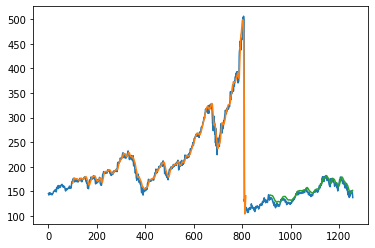

In [257]:
### Plotting
# shift train predictions for plotting

look_back=100 # timestep
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting

testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:] = test_predict

# plot baseline and predictions

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()



#### Preidct the stock prices of future 30 days

In [258]:
len(test_data)

441

To claculate the data for 22nd may you have to condider the data of previous 30 days

In [259]:
x_input = test_data[341:].reshape(1, -1)
x_input.shape
x_input

array([[0.14875391, 0.14444584, 0.13918597, 0.13720726, 0.13259862,
        0.1323732 , 0.13119599, 0.15902317, 0.17016907, 0.16974327,
        0.17282405, 0.16546024, 0.16418284, 0.16235441, 0.1702943 ,
        0.17392611, 0.16350657, 0.15479023, 0.15539136, 0.16518472,
        0.16458359, 0.15539136, 0.15143394, 0.14396994, 0.13332498,
        0.14001252, 0.14529743, 0.1459737 , 0.14116468, 0.14958046,
        0.14875391, 0.14108954, 0.13139637, 0.12673763, 0.14053851,
        0.12944271, 0.11994991, 0.1096556 , 0.1208516 , 0.13212273,
        0.13470257, 0.14311835, 0.14662492, 0.15524108, 0.1587226 ,
        0.16839073, 0.17001879, 0.17222292, 0.1806387 , 0.17765811,
        0.16974327, 0.16899186, 0.17933626, 0.17087038, 0.16278021,
        0.16355667, 0.15842204, 0.14755166, 0.15233563, 0.1591985 ,
        0.1463995 , 0.14584847, 0.15168441, 0.15125861, 0.14922981,
        0.13763306, 0.14036318, 0.12513463, 0.12455855, 0.14226675,
        0.12726362, 0.12804008, 0.13184721, 0.14

In [260]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.1487539135879774,
 0.1444458359423919,
 0.13918597370068875,
 0.13720726361928615,
 0.1325986224170319,
 0.13237319974953032,
 0.13119599248591102,
 0.15902316844082653,
 0.17016906700062612,
 0.16974326862867878,
 0.17282404508453347,
 0.165460237946149,
 0.16418284283030676,
 0.16235441452723853,
 0.17029430181590482,
 0.17392611145898557,
 0.16350657482780212,
 0.1547902316844082,
 0.15539135879774574,
 0.16518472135253592,
 0.1645835942391985,
 0.15539135879774574,
 0.15143393863494048,
 0.14396994364433308,
 0.13332498434564805,
 0.14001252348152782,
 0.14529743268628675,
 0.14597370068879145,
 0.14116468378209135,
 0.14958046336881647,
 0.1487539135879774,
 0.14108954289292414,
 0.13139636819035688,
 0.1267376330619912,
 0.1405385097056981,
 0.12944270507201,
 0.11994990607388845,
 0.10965560425798371,
 0.12085159674389478,
 0.13212273011897302,
 0.13470256731371316,
 0.14311834690043823,
 0.14662492172824038,
 0.1552410770194113,
 0.1587226048841578,
 0.16839073262366933,
 0.

In [261]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.10977824]
101
1 day input [0.14444584 0.13918597 0.13720726 0.13259862 0.1323732  0.13119599
 0.15902317 0.17016907 0.16974327 0.17282405 0.16546024 0.16418284
 0.16235441 0.1702943  0.17392611 0.16350657 0.15479023 0.15539136
 0.16518472 0.16458359 0.15539136 0.15143394 0.14396994 0.13332498
 0.14001252 0.14529743 0.1459737  0.14116468 0.14958046 0.14875391
 0.14108954 0.13139637 0.12673763 0.14053851 0.12944271 0.11994991
 0.1096556  0.1208516  0.13212273 0.13470257 0.14311835 0.14662492
 0.15524108 0.1587226  0.16839073 0.17001879 0.17222292 0.1806387
 0.17765811 0.16974327 0.16899186 0.17933626 0.17087038 0.16278021
 0.16355667 0.15842204 0.14755166 0.15233563 0.1591985  0.1463995
 0.14584847 0.15168441 0.15125861 0.14922981 0.13763306 0.14036318
 0.12513463 0.12455855 0.14226675 0.12726362 0.12804008 0.13184721
 0.14822793 0.12505949 0.12633688 0.11326237 0.11939887 0.09933626
 0.08946775 0.10086412 0.09693175 0.10619912 0.08510958 0.07641828
 0.07701941 0.09084534 0.08395742 0

In [262]:
day_new=np.arange(1, 101)
day_pred=np.arange(101, 131)

In [263]:
len(df1)

1258

In [264]:
df3=df1.tolist()
df3.extend(lst_output)

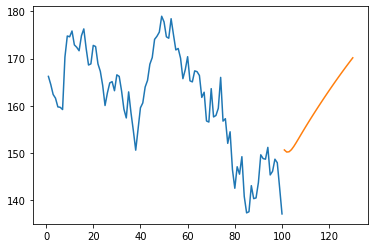

In [265]:
plt.plot(day_new, scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

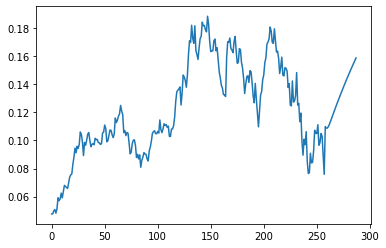

In [266]:
plt.plot(df3[1000:])

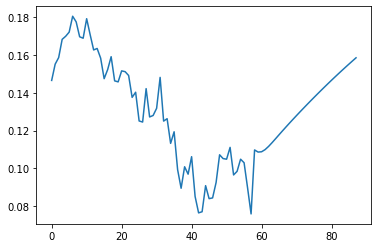

In [267]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])